# Importing Libraries

In [5]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [6]:
# Define Path

path = r'/Users/umachidambaram/June-2021 Instacart Basket Analysis'

In [7]:
# Data set Orders Products Customers

df_ords_prods_cust = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data ', 'orders_products_customer4_9.pkl'))

2. The columns First Name, Last Name, income, n_dependants, fam_status and age are PII data.

In [4]:
df_ords_prods_cust.head()

user_id First Name Last Name  Gender     STATE  Age date_joined  \
0    26711    Deborah  Esquivel  Female  Missouri   48    1/1/2017   
1    26711    Deborah  Esquivel  Female  Missouri   48    1/1/2017   
2    26711    Deborah  Esquivel  Female  Missouri   48    1/1/2017   
3    26711    Deborah  Esquivel  Female  Missouri   48    1/1/2017   
4    26711    Deborah  Esquivel  Female  Missouri   48    1/1/2017   

   n_dependants fam_status  income  ...    price_range_loc     busiest_day  \
0             3    married  165665  ...                NaN  Regularly busy   
1             3    married  165665  ...                NaN  Regularly busy   
2             3    married  165665  ...                NaN  Regularly busy   
3             3    married  165665  ...  Low-range product  Regularly busy   
4             3    married  165665  ...  Low-range product  Regularly busy   

         Busiest days  busiest_period_of_day  max_order  loyalty_flag  \
0        Busiest day2          Fewest orders          8  New customer   
1      Regularly busy          Fewest orders          8  New customer   
2        Busiest day2          Fewest orders          8  New customer   
3      Regularly busy          Fewest orders          8  New customer   
4  Least busiest day2          Fewest orders          8  New customer   

   average_price      Spender  Frequency_order    Frequency_Flag  
0       7.988889  Low spender             19.0  Regular customer  
1       7.988889  Low spender             19.0  Regular customer  
2       7.988889  Low spender             19.0  Regular customer  
3       7.988889  Low spender             19.0  Regular customer  
4       7.988889  Low spender             19.0  Regular customer  

[5 rows x 35 columns]

In [8]:
# 3. Result for Region column

Region = []

for var in df_ords_prods_cust["STATE"]:
    if ((var == 'Maine') | (var == 'New Hampshire') | (var == 'Vermont') | (var == 'Massachusetts') | (var =='Rhode Island') | (var =='Connecticut') | (var == 'New York') | (var == 'Pennsylvania') | (var == 'New Jersey')):
        Region.append("Northeast")
    elif ((var == 'Wisconsin') | (var == 'Michigan') | (var == 'Illinois') | (var =='Indiana') | (var =='Ohio') | (var == 'North Dakota') | (var =='South Dakota') | (var =='Nebraska') | (var =='Kansas') | (var == 'Minnesota') | (var == 'Iowa') | (var =='Missouri')):
        Region.append("Midwest")
    elif ((var == 'Delaware') | (var == 'Maryland') | (var == 'District of Columbia') | (var == 'Virginia') | (var =='West Virginia') | (var =='North Carolina') | (var =='South Carolina') | (var =='Georgia') | (var == 'Florida') | (var =='Kentucky') |(var == 'Tennessee') | (var == 'Mississippi') | (var =='Alabama') | (var == 'Oklahoma') | (var =='Texas') | (var =='Arkansas') | (var == 'Louisiana')):
        Region.append("South")
    else:
        Region.append("West")
    
     

In [9]:
# Create Region column

df_ords_prods_cust['Region'] = Region

In [10]:
# Check frequency of Region column

df_ords_prods_cust['Region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: Region, dtype: int64

In [11]:
# Check average price of order in Regions

df_ords_prods_cust.groupby('Region')['average_price'].mean()

Region
Midwest      12.715483
Northeast    11.554997
South        12.195577
West         11.319834
Name: average_price, dtype: float64

In [13]:
# 4. Check current number of rows and columns

df_ords_prods_cust.shape

(32404859, 36)

In [12]:
#Filter rows were max_order is less than 5

df_filtered = df_ords_prods_cust[df_ords_prods_cust['max_order'] <= 5]

In [17]:
df_filtered.shape

(2233435, 36)

In [13]:
# Drop the rows were max_order is less than 5

df_Loyal = df_ords_prods_cust.drop(df_filtered.index)

In [22]:
# Check the number of rows on new dataframe

df_Loyal.shape

(30171424, 36)

In [14]:
# Export data to pkl

df_Loyal.to_pickle(os.path.join(path, '02 Data', 'Prepared Data ', 'df_Loyal4.10.pkl'))



In [24]:
# 5. 

df_Loyal.describe()

user_id           Age  n_dependants        income  Unnamed: 0_x  \
count  3.017142e+07  3.017142e+07  3.017142e+07  3.017142e+07  3.017142e+07   
mean   1.029156e+05  4.947082e+01  1.502004e+00  9.977020e+04  2.559965e+04   
std    5.945296e+04  1.848772e+01  1.118931e+00  4.318342e+04  1.408082e+04   
min    1.000000e+00  1.800000e+01  0.000000e+00  2.590300e+04  0.000000e+00   
25%    5.143500e+04  3.300000e+01  1.000000e+00  6.742400e+04  1.354800e+04   
50%    1.025730e+05  4.900000e+01  2.000000e+00  9.682300e+04  2.528000e+04   
75%    1.543420e+05  6.500000e+01  3.000000e+00  1.281500e+05  3.794400e+04   
max    2.062090e+05  8.100000e+01  3.000000e+00  5.939010e+05  4.969200e+04   

         product_id      aisle_id  department_id        prices  Unnamed: 0_y  \
count  3.017142e+07  3.017142e+07   3.017142e+07  3.017142e+07  3.017142e+07   
mean   2.559794e+04  7.118457e+01   9.923708e+00  1.185801e+01  1.709500e+06   
std    1.407927e+04  3.822635e+01   6.283019e+00  4.843487e+02  9.862397e+05   
min    1.000000e+00  1.000000e+00   1.000000e+00  1.000000e+00  0.000000e+00   
25%    1.354800e+04  3.100000e+01   4.000000e+00  4.200000e+00  8.558560e+05   
50%    2.527900e+04  8.300000e+01   9.000000e+00  7.400000e+00  1.708478e+06   
75%    3.794000e+04  1.070000e+02   1.600000e+01  1.130000e+01  2.565005e+06   
max    4.968800e+04  1.340000e+02   2.100000e+01  9.999900e+04  3.421081e+06   

           order_id  order_number  orders_day_of_week  order_hour_of_day  \
count  3.017142e+07  3.017142e+07        3.017142e+07       3.017142e+07   
mean   1.710153e+06  1.822380e+01        2.742373e+00       1.340360e+01   
std    9.873695e+05  1.769653e+01        2.088409e+00       4.249694e+00   
min    2.000000e+00  1.000000e+00        0.000000e+00       0.000000e+00   
25%    8.552950e+05  6.000000e+00        1.000000e+00       1.000000e+01   
50%    1.710081e+06  1.200000e+01        3.000000e+00       1.300000e+01   
75%    2.565050e+06  2.500000e+01        5.000000e+00       1.600000e+01   
max    3.421083e+06  9.900000e+01        6.000000e+00       2.300000e+01   

       days_since_prior_order  add_to_cart_order     reordered     max_order  \
count            2.866855e+07       3.017142e+07  3.017142e+07  3.017142e+07   
mean             1.063359e+01       8.364752e+00  6.139803e-01  3.519922e+01   
std              8.455138e+00       7.136493e+00  4.868352e-01  2.475268e+01   
min              0.000000e+00       1.000000e+00  0.000000e+00  6.000000e+00   
25%              5.000000e+00       3.000000e+00  0.000000e+00  1.500000e+01   
50%              7.000000e+00       6.000000e+00  1.000000e+00  2.900000e+01   
75%              1.400000e+01       1.100000e+01  1.000000e+00  4.900000e+01   
max              3.000000e+01       1.450000e+02  1.000000e+00  9.900000e+01   

       average_price  Frequency_order  
count   3.017142e+07     3.017142e+07  
mean    1.185801e+01     9.707314e+00  
std     7.812315e+01     6.390900e+00  
min     1.000000e+00     0.000000e+00  
25%     7.395238e+00     6.000000e+00  
50%     7.825000e+00     7.000000e+00  
75%     8.246486e+00     1.200000e+01  
max     1.500694e+04     3.000000e+01

In [15]:
# Create income profile column

df_Loyal.loc[df_Loyal['income'] < 750000, 'income_Range'] = 'Low income'

In [16]:
df_Loyal.loc[(df_Loyal['income'] >= 75000) & (df_Loyal['income'] < 200000), 'income_Range'] = 'Average income 1'

In [17]:
df_Loyal.loc[(df_Loyal['income'] >= 200000) & (df_Loyal['income'] < 400000), 'income_Range'] = 'Average income(H) 2'

In [18]:
df_Loyal.loc[df_Loyal['income'] > 400000, 'income_Range'] = 'High income'

In [72]:
df_Loyal['income_Range'].value_counts()

Average income 1       20295510
Low income              9625556
Average income(H) 2      203954
High income               46404
Name: income_Range, dtype: int64

In [19]:
# Create Age profile column

df_Loyal.loc[df_Loyal['Age'] < 25, 'Age_Range'] = 'age18-25'

In [20]:
df_Loyal.loc[(df_Loyal['Age'] >= 25) & (df_Loyal['Age'] < 45), 'Age_Range'] = 'age25-45'

In [21]:
df_Loyal.loc[(df_Loyal['Age'] >= 45) & (df_Loyal['Age'] < 60), 'Age_Range'] = 'age45-60'

In [22]:
df_Loyal.loc[df_Loyal['Age'] > 60, 'Age_Range'] = 'age60-81'

In [38]:
df_Loyal['Age_Range'].value_counts()

age60-81    9855503
age25-45    9416630
age45-60    7121806
age18-25    3327203
Name: Age_Range, dtype: int64

In [23]:
babies = df_Loyal[(df_Loyal['user_id']) & (df_Loyal['department_id'] == 18)]

In [98]:
babies

user_id First Name Last Name  Gender         STATE  Age date_joined  \
2415         6965    Brandon      Mata    Male  North Dakota   70    1/1/2017   
2502         6965    Brandon      Mata    Male  North Dakota   70    1/1/2017   
2503         6965    Brandon      Mata    Male  North Dakota   70    1/1/2017   
2528         6965    Brandon      Mata    Male  North Dakota   70    1/1/2017   
2532         6965    Brandon      Mata    Male  North Dakota   70    1/1/2017   
...           ...        ...       ...     ...           ...  ...         ...   
32401593    19707  Christina   Wallace  Female       Montana   27    4/1/2020   
32401604    19707  Christina   Wallace  Female       Montana   27    4/1/2020   
32401605    19707  Christina   Wallace  Female       Montana   27    4/1/2020   
32401607    19707  Christina   Wallace  Female       Montana   27    4/1/2020   
32401608    19707  Christina   Wallace  Female       Montana   27    4/1/2020   

          n_dependants        fam_status  income  ...    Busiest days  \
2415                 0  divorced/widowed  100091  ...    Busiest day1   
2502                 0  divorced/widowed  100091  ...    Busiest day1   
2503                 0  divorced/widowed  100091  ...    Busiest day1   
2528                 0  divorced/widowed  100091  ...    Busiest day1   
2532                 0  divorced/widowed  100091  ...    Busiest day1   
...                ...               ...     ...  ...             ...   
32401593             3           married   80165  ...  Regularly busy   
32401604             3           married   80165  ...  Regularly busy   
32401605             3           married   80165  ...  Regularly busy   
32401607             3           married   80165  ...  Regularly busy   
32401608             3           married   80165  ...  Regularly busy   

          busiest_period_of_day max_order  loyalty_flag  average_price  \
2415              Fewest orders         9  New customer       7.490580   
2502              Fewest orders         9  New customer       7.490580   
2503              Fewest orders         9  New customer       7.490580   
2528              Fewest orders         9  New customer       7.490580   
2532              Fewest orders         9  New customer       7.490580   
...                         ...       ...           ...            ...   
32401593          Fewest orders         7  New customer       7.980645   
32401604          Fewest orders         7  New customer       7.980645   
32401605          Fewest orders         7  New customer       7.980645   
32401607          Fewest orders         7  New customer       7.980645   
32401608          Fewest orders         7  New customer       7.980645   

              Spender  Frequency_order     Frequency_Flag   Region  \
2415      Low spender              7.0  Frequent customer  Midwest   
2502      Low spender              7.0  Frequent customer  Midwest   
2503      Low spender              7.0  Frequent customer  Midwest   
2528      Low spender              7.0  Frequent customer  Midwest   
2532      Low spender              7.0  Frequent customer  Midwest   
...               ...              ...                ...      ...   
32401593  Low spender             14.0   Regular customer     West   
32401604  Low spender             14.0   Regular customer     West   
32401605  Low spender             14.0   Regular customer     West   
32401607  Low spender             14.0   Regular customer     West   
32401608  Low spender             14.0   Regular customer     West   

              income_Range  
2415      Average income 1  
2502      Average income 1  
2503      Average income 1  
2528      Average income 1  
2532      Average income 1  
...                    ...  
32401593  Average income 1  
32401604  Average income 1  
32401605  Average income 1  
32401607  Average income 1  
32401608  Average income 1  

[204150 rows x 37 columns]

In [24]:
df_babies = babies

In [46]:
df_babies1.head()

user_id         STATE  n_dependants  max_order  average_price  \
2415     6965  North Dakota             0          9        7.49058   
2502     6965  North Dakota             0          9        7.49058   
2503     6965  North Dakota             0          9        7.49058   
2528     6965  North Dakota             0          9        7.49058   
2532     6965  North Dakota             0          9        7.49058   

      Frequency_order   Region      income_Range  
2415              7.0  Midwest  Average income 1  
2502              7.0  Midwest  Average income 1  
2503              7.0  Midwest  Average income 1  
2528              7.0  Midwest  Average income 1  
2532              7.0  Midwest  Average income 1

In [35]:
df_babies1 = df_babies[['user_id', 'STATE', 'n_dependants', 'max_order', 'average_price', 'Frequency_order', 'Region', 'income_Range']]

In [45]:
dev = np.random.rand(len(df_babies1)) <= 0.7

In [47]:
big = df_babies1[dev]

In [48]:
small = df_babies1[~dev]

In [49]:
df_babies2 = small[['user_id', 'STATE', 'n_dependants', 'max_order', 'average_price', 'Frequency_order', 'Region', 'income_Range']]

In [56]:
df_babies2.shape

(61732, 8)

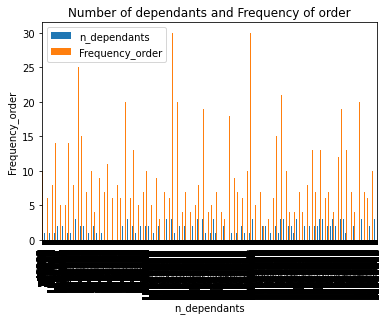

In [51]:
axbabies = df_babies2.[['n_dependants','Frequency_order']].plot(kind='bar', title = "Number of dependants and Frequency of order")
axbabies.set_xlabel("n_dependants")
axbabies.set_ylabel("Frequency_order")
plt.show()

In [25]:
pets = df_Loyal[(df_Loyal['user_id']) & (df_Loyal['department_id'] == 8)]

In [56]:
pets

user_id First Name Last Name  Gender     STATE  Age date_joined  \
171         65803    Kenneth    Farley    Male     Idaho   35    1/1/2017   
4137       100123      Steve    Rogers    Male   Florida   31    1/1/2017   
4624       104359       Carl    Benton    Male     Idaho   66    1/1/2017   
9221        76659        NaN   Gilbert    Male  Colorado   26    1/1/2017   
9222        76659        NaN   Gilbert    Male  Colorado   26    1/1/2017   
...           ...        ...       ...     ...       ...  ...         ...   
32404392    83573     Gloria    Murray  Female  Michigan   28    4/1/2020   
32404393    83573     Gloria    Murray  Female  Michigan   28    4/1/2020   
32404394    83573     Gloria    Murray  Female  Michigan   28    4/1/2020   
32404395    83573     Gloria    Murray  Female  Michigan   28    4/1/2020   
32404659   157533        Ned     Stark    Male      Utah   53    4/1/2020   

          n_dependants fam_status  income  ...  busiest_period_of_day  \
171                  2    married   99568  ...          Fewest orders   
4137                 2    married   95906  ...          Fewest orders   
4624                 1    married  104025  ...          Fewest orders   
9221                 2    married   41709  ...          Fewest orders   
9222                 2    married   41709  ...          Fewest orders   
...                ...        ...     ...  ...                    ...   
32404392             0     single   32237  ...          Fewest orders   
32404393             0     single   32237  ...          Fewest orders   
32404394             0     single   32237  ...          Fewest orders   
32404395             0     single   32237  ...          Fewest orders   
32404659             0     single   35973  ...          Fewest orders   

          max_order      loyalty_flag  average_price      Spender  \
171               9      New customer       8.375962  Low spender   
4137             18  Regular customer       7.917826  Low spender   
4624             18  Regular customer       7.965696  Low spender   
9221             32  Regular customer       8.217224  Low spender   
9222             32  Regular customer       8.217224  Low spender   
...             ...               ...            ...          ...   
32404392         23  Regular customer       6.595266  Low spender   
32404393         23  Regular customer       6.595266  Low spender   
32404394         23  Regular customer       6.595266  Low spender   
32404395         23  Regular customer       6.595266  Low spender   
32404659          6      New customer       6.555556  Low spender   

          Frequency_order     Frequency_Flag    Region  income_Range  \
171                   7.0  Frequent customer  Region 4    Low income   
4137                  8.0  Frequent customer  Region 3    Low income   
4624                 15.0   Regular customer  Region 4    Low income   
9221                  8.0  Frequent customer  Region 4    Low income   
9222                  8.0  Frequent customer  Region 4    Low income   
...                   ...                ...       ...           ...   
32404392             14.0   Regular customer  Region 2    Low income   
32404393             14.0   Regular customer  Region 2    Low income   
32404394             14.0   Regular customer  Region 2    Low income   
32404395             14.0   Regular customer  Region 2    Low income   
32404659              9.0  Frequent customer  Region 4    Low income   

          Age_Range  
171        age25-45  
4137       age25-45  
4624       age60-81  
9221       age25-45  
9222       age25-45  
...             ...  
32404392   age25-45  
32404393   age25-45  
32404394   age25-45  
32404395   age25-45  
32404659   age45-60  

[44018 rows x 38 columns]

In [26]:
df_pets = pets

In [40]:
df_pets1 = df_pets[['user_id', 'STATE', 'n_dependants', 'max_order', 'average_price', 'Frequency_order', 'Region', 'income_Range']]

In [52]:
dev1 = np.random.rand(len(df_pets1)) <= 0.7

In [53]:
big1 = df_pets1[dev1]

In [54]:
small1 = df_pets1[~dev1]

In [55]:
df_pets2 = small1[['user_id', 'STATE', 'n_dependants', 'max_order', 'average_price', 'Frequency_order', 'Region', 'income_Range']]

In [57]:
axpets = df_pets2.groupby[['Region','max_order']].plot(kind='bar', title = "Maximum order in different regions of pet owners")


TypeError: 'method' object is not subscriptable

In [27]:
international = df_Loyal[(df_Loyal['user_id']) & (df_Loyal['department_id'] == 6)]

In [28]:
df_international = international

In [41]:
df_international1 = df_international[['user_id', 'STATE', 'n_dependants', 'max_order', 'average_price', 'Frequency_order', 'Region', 'income_Range']]

In [29]:
nonvegetarians = df_Loyal[(df_Loyal['user_id']) & (df_Loyal['department_id'] == 12)]

In [30]:
df_nonvegetarians = nonvegetarians

In [42]:
df_nonveg1 = df_nonvegetarians[['user_id', 'STATE', 'n_dependants', 'max_order', 'average_price', 'Frequency_order', 'Region', 'income_Range']]

In [31]:
alcohol = df_Loyal[(df_Loyal['user_id']) & (df_Loyal['department_id'] == 5)]

In [79]:
alcohol

user_id First Name Last Name  Gender      STATE  Age date_joined  \
208        125935   Michelle     Hicks  Female       Iowa   40    1/1/2017   
209        125935   Michelle     Hicks  Female       Iowa   40    1/1/2017   
212        125935   Michelle     Hicks  Female       Iowa   40    1/1/2017   
213        125935   Michelle     Hicks  Female       Iowa   40    1/1/2017   
257        125935   Michelle     Hicks  Female       Iowa   40    1/1/2017   
...           ...        ...       ...     ...        ...  ...         ...   
32396661    61679     Justin  Calderon    Male      Maine   69    4/1/2020   
32396727    61679     Justin  Calderon    Male      Maine   69    4/1/2020   
32396741    61679     Justin  Calderon    Male      Maine   69    4/1/2020   
32399978   200065       Gary    Wilson    Male  Tennessee   59    4/1/2020   
32400854   131857     Denise    Morris  Female   Nebraska   39    4/1/2020   

          n_dependants fam_status  income  ...        Busiest days  \
208                  0     single   42049  ...  Least busiest day2   
209                  0     single   42049  ...  Least busiest day2   
212                  0     single   42049  ...        Busiest day2   
213                  0     single   42049  ...      Regularly busy   
257                  0     single   42049  ...        Busiest day2   
...                ...        ...     ...  ...                 ...   
32396661             2    married  125494  ...  Least busiest day1   
32396727             2    married  125494  ...      Regularly busy   
32396741             2    married  125494  ...  Least busiest day1   
32399978             3    married  243617  ...      Regularly busy   
32400854             1    married   74564  ...        Busiest day2   

          busiest_period_of_day max_order      loyalty_flag  average_price  \
208               Fewest orders        18  Regular customer       6.371795   
209               Fewest orders        18  Regular customer       6.371795   
212               Fewest orders        18  Regular customer       6.371795   
213               Fewest orders        18  Regular customer       6.371795   
257               Fewest orders        18  Regular customer       6.371795   
...                         ...       ...               ...            ...   
32396661          Fewest orders        12  Regular customer       7.250515   
32396727          Fewest orders        12  Regular customer       7.250515   
32396741          Fewest orders        12  Regular customer       7.250515   
32399978          Fewest orders        18  Regular customer      96.595833   
32400854          Fewest orders         6      New customer       8.286792   

               Spender  Frequency_order     Frequency_Flag     Region  \
208        Low spender             18.0   Regular customer    Midwest   
209        Low spender             18.0   Regular customer    Midwest   
212        Low spender             18.0   Regular customer    Midwest   
213        Low spender             18.0   Regular customer    Midwest   
257        Low spender             18.0   Regular customer    Midwest   
...                ...              ...                ...        ...   
32396661   Low spender             15.0   Regular customer  Northeast   
32396727   Low spender             15.0   Regular customer  Northeast   
32396741   Low spender             15.0   Regular customer  Northeast   
32399978  High spender             12.0   Regular customer      South   
32400854   Low spender              8.0  Frequent customer    Midwest   

                 income_Range  
208                Low income  
209                Low income  
212                Low income  
213                Low income  
257                Low income  
...                       ...  
32396661     Average income 1  
32396727     Average income 1  
32396741     Average income 1  
32399978  Average income(H) 2  
32400854           Low income  

[70814 rows x 37 columns]

In [32]:
df_alcohol = alcohol

In [33]:
df_alcohol.head()

user_id First Name Last Name  Gender STATE  Age date_joined  \
208   125935   Michelle     Hicks  Female  Iowa   40    1/1/2017   
209   125935   Michelle     Hicks  Female  Iowa   40    1/1/2017   
212   125935   Michelle     Hicks  Female  Iowa   40    1/1/2017   
213   125935   Michelle     Hicks  Female  Iowa   40    1/1/2017   
257   125935   Michelle     Hicks  Female  Iowa   40    1/1/2017   

     n_dependants fam_status  income  ...  busiest_period_of_day  max_order  \
208             0     single   42049  ...          Fewest orders         18   
209             0     single   42049  ...          Fewest orders         18   
212             0     single   42049  ...          Fewest orders         18   
213             0     single   42049  ...          Fewest orders         18   
257             0     single   42049  ...          Fewest orders         18   

         loyalty_flag  average_price      Spender  Frequency_order  \
208  Regular customer       6.371795  Low spender             18.0   
209  Regular customer       6.371795  Low spender             18.0   
212  Regular customer       6.371795  Low spender             18.0   
213  Regular customer       6.371795  Low spender             18.0   
257  Regular customer       6.371795  Low spender             18.0   

       Frequency_Flag   Region  income_Range  Age_Range  
208  Regular customer  Midwest    Low income   age25-45  
209  Regular customer  Midwest    Low income   age25-45  
212  Regular customer  Midwest    Low income   age25-45  
213  Regular customer  Midwest    Low income   age25-45  
257  Regular customer  Midwest    Low income   age25-45  

[5 rows x 38 columns]

In [43]:
df_alcohol1 = df_alcohol[['user_id', 'STATE', 'n_dependants', 'max_order', 'average_price', 'Frequency_order', 'Region', 'income_Range']]